# Clustering - dados de segmentação de clientes do shopping

### Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import plotly as py
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

mpl.style.use(['seaborn-notebook'])

%matplotlib inline

### Carrega os dados

In [2]:
data = pd.read_csv('../Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
print(f'Linhas: {data.shape[0]} | Colunas: {data.shape[1]}')

Linhas: 200 | Colunas: 5


In [4]:
print(f'Colunas presentes: {data.columns.values}')

Colunas presentes: ['CustomerID' 'Gender' 'Age' 'Annual Income (k$)' 'Spending Score (1-100)']


### Dicionário dos dados

- **`CustomerID`**: identificador exclusivo do cliente
- **`Gender`**: sexo do cliente
- **`Age`**: idade do cliente
- **`Annual Income (k$)`**: renda anual
- **`Spending Score (1-100)`**: pontuação atribuída pelo shopping com base no comportamento do cliente e na natureza dos gastos

### Estatística dos dados

In [5]:
data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


### Dados nulos

In [6]:
data.isnull().mean()

CustomerID                0.0
Gender                    0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

### Dados duplicados

In [7]:
data.duplicated().mean()

0.0

### Report

In [8]:
from pandas_profiling import ProfileReport

report = data.profile_report(sort='None', html={'style':{'full_width':True}}, progress_bar=False)
report.to_notebook_iframe()

### Visualização dos dados

#### Histogramas

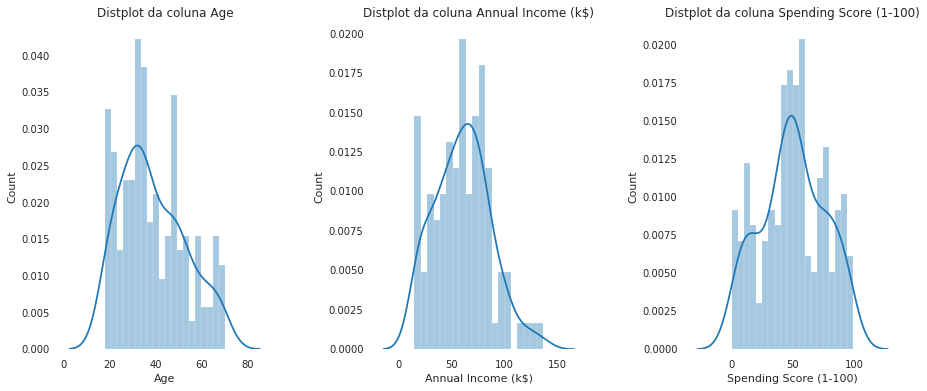

In [9]:
plt.figure(figsize=[15, 6])
n= 0

for i in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n+= 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace= 0.5, wspace= 0.5)
    sns.distplot(data[i], bins= 20)
    plt.title(f'Distplot da coluna {i}')
    plt.ylabel('Count')
    
plt.show()

#### Countplot do gênero

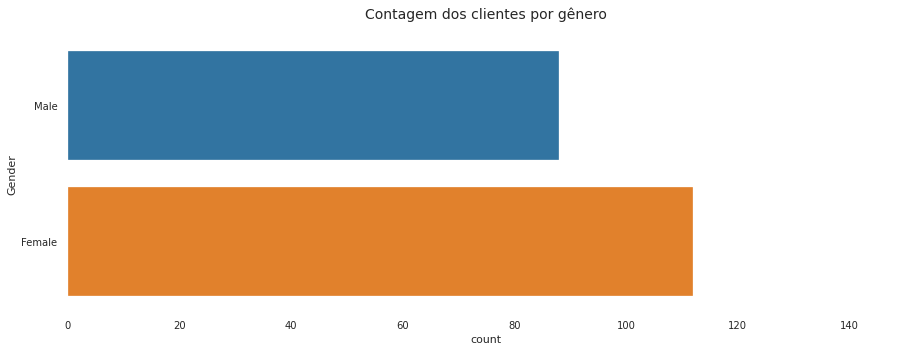

In [10]:
plt.figure(figsize=[15, 5])
sns.countplot(y= 'Gender', data= data)
plt.title('Contagem dos clientes por gênero', y=1.05, size=14)
plt.xlim(0, 150)
plt.show()

#### Regplot das variáveis

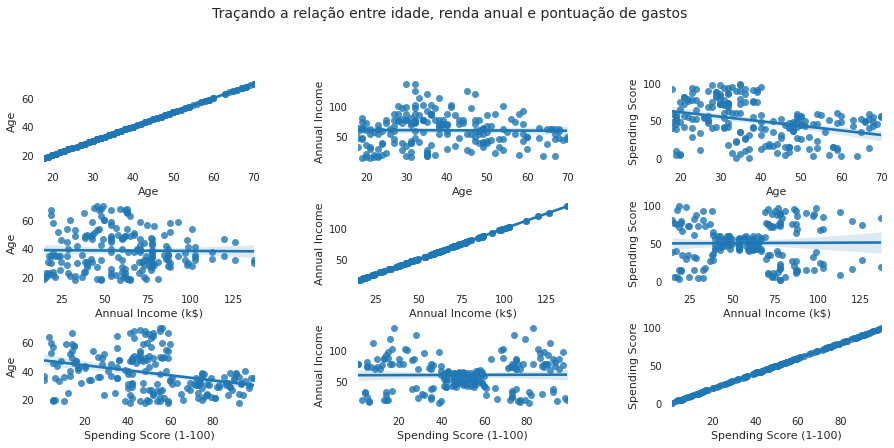

In [11]:
plt.figure(figsize=[15, 6])
n= 0

for i in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    for j in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
        n+= 1
        plt.subplot(3, 3, n)
        plt.subplots_adjust(hspace= 0.5, wspace= 0.5)
        sns.regplot(x= i, y= j, data= data)
        plt.ylabel(j.split()[0] + ' ' + j.split()[1] if len(j.split()) > 1 else j)
        
plt.suptitle(f'Traçando a relação entre idade, renda anual e pontuação de gastos', y=1.05, size=14)  
plt.show()

### Correlação dos dados

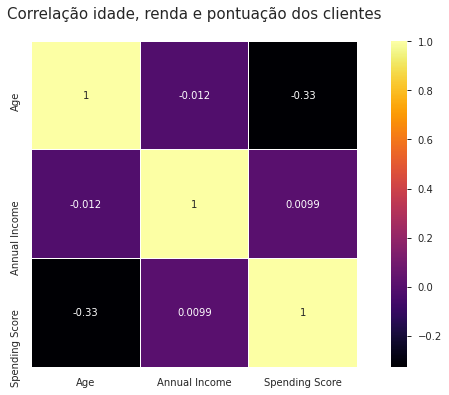

In [12]:
plt.figure(figsize=[12,6])
plt.title('Correlação idade, renda e pontuação dos clientes', y=1.05, size=15)
labels=['Age', 'Annual Income', 'Spending Score']

sns.heatmap(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(), 
            cmap=plt.cm.inferno, 
            annot=True, 
            linewidth=0.1, 
            vmax=1.0, 
            square=True, 
            linecolor='white', 
            xticklabels=labels, 
            yticklabels=labels)
plt.show()

### Transformação do Gênero

In [13]:
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1}).astype(int)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


### DBSCAN

In [14]:
from sklearn.cluster import DBSCAN

In [15]:
X = data.drop(['CustomerID'], axis=1).values

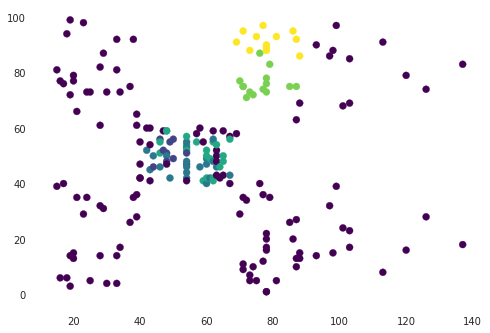

Estimated number of clusters: 5
Estimated number of noise points: 122


In [16]:
dbscan = DBSCAN(eps=10, min_samples=10).fit(X)

y_dbscan = dbscan.fit_predict(X)
plt.scatter(data['Annual Income (k$)'].values, data['Spending Score (1-100)'].values, c=y_dbscan, cmap='viridis')
plt.show()


n_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
n_noise_ = list(y_dbscan).count(-1)


print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)